In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### Dataset info:
Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [51]:
data = pd.read_csv("BostonHousing.csv")
data.rename(columns={"medv": "price"},inplace=True)
#columns of database
data.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')

## Preparing dataset

In [52]:
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [53]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [54]:
#check the missing value
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [55]:
data.fillna(data.mean(),inplace=True)

In [56]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

## Exploratory data analysis (EDA)

## Correlation
### The correlation between two variables is a measure of the strength and direction of the linear relationship between them.

In [57]:
## Correlation

data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


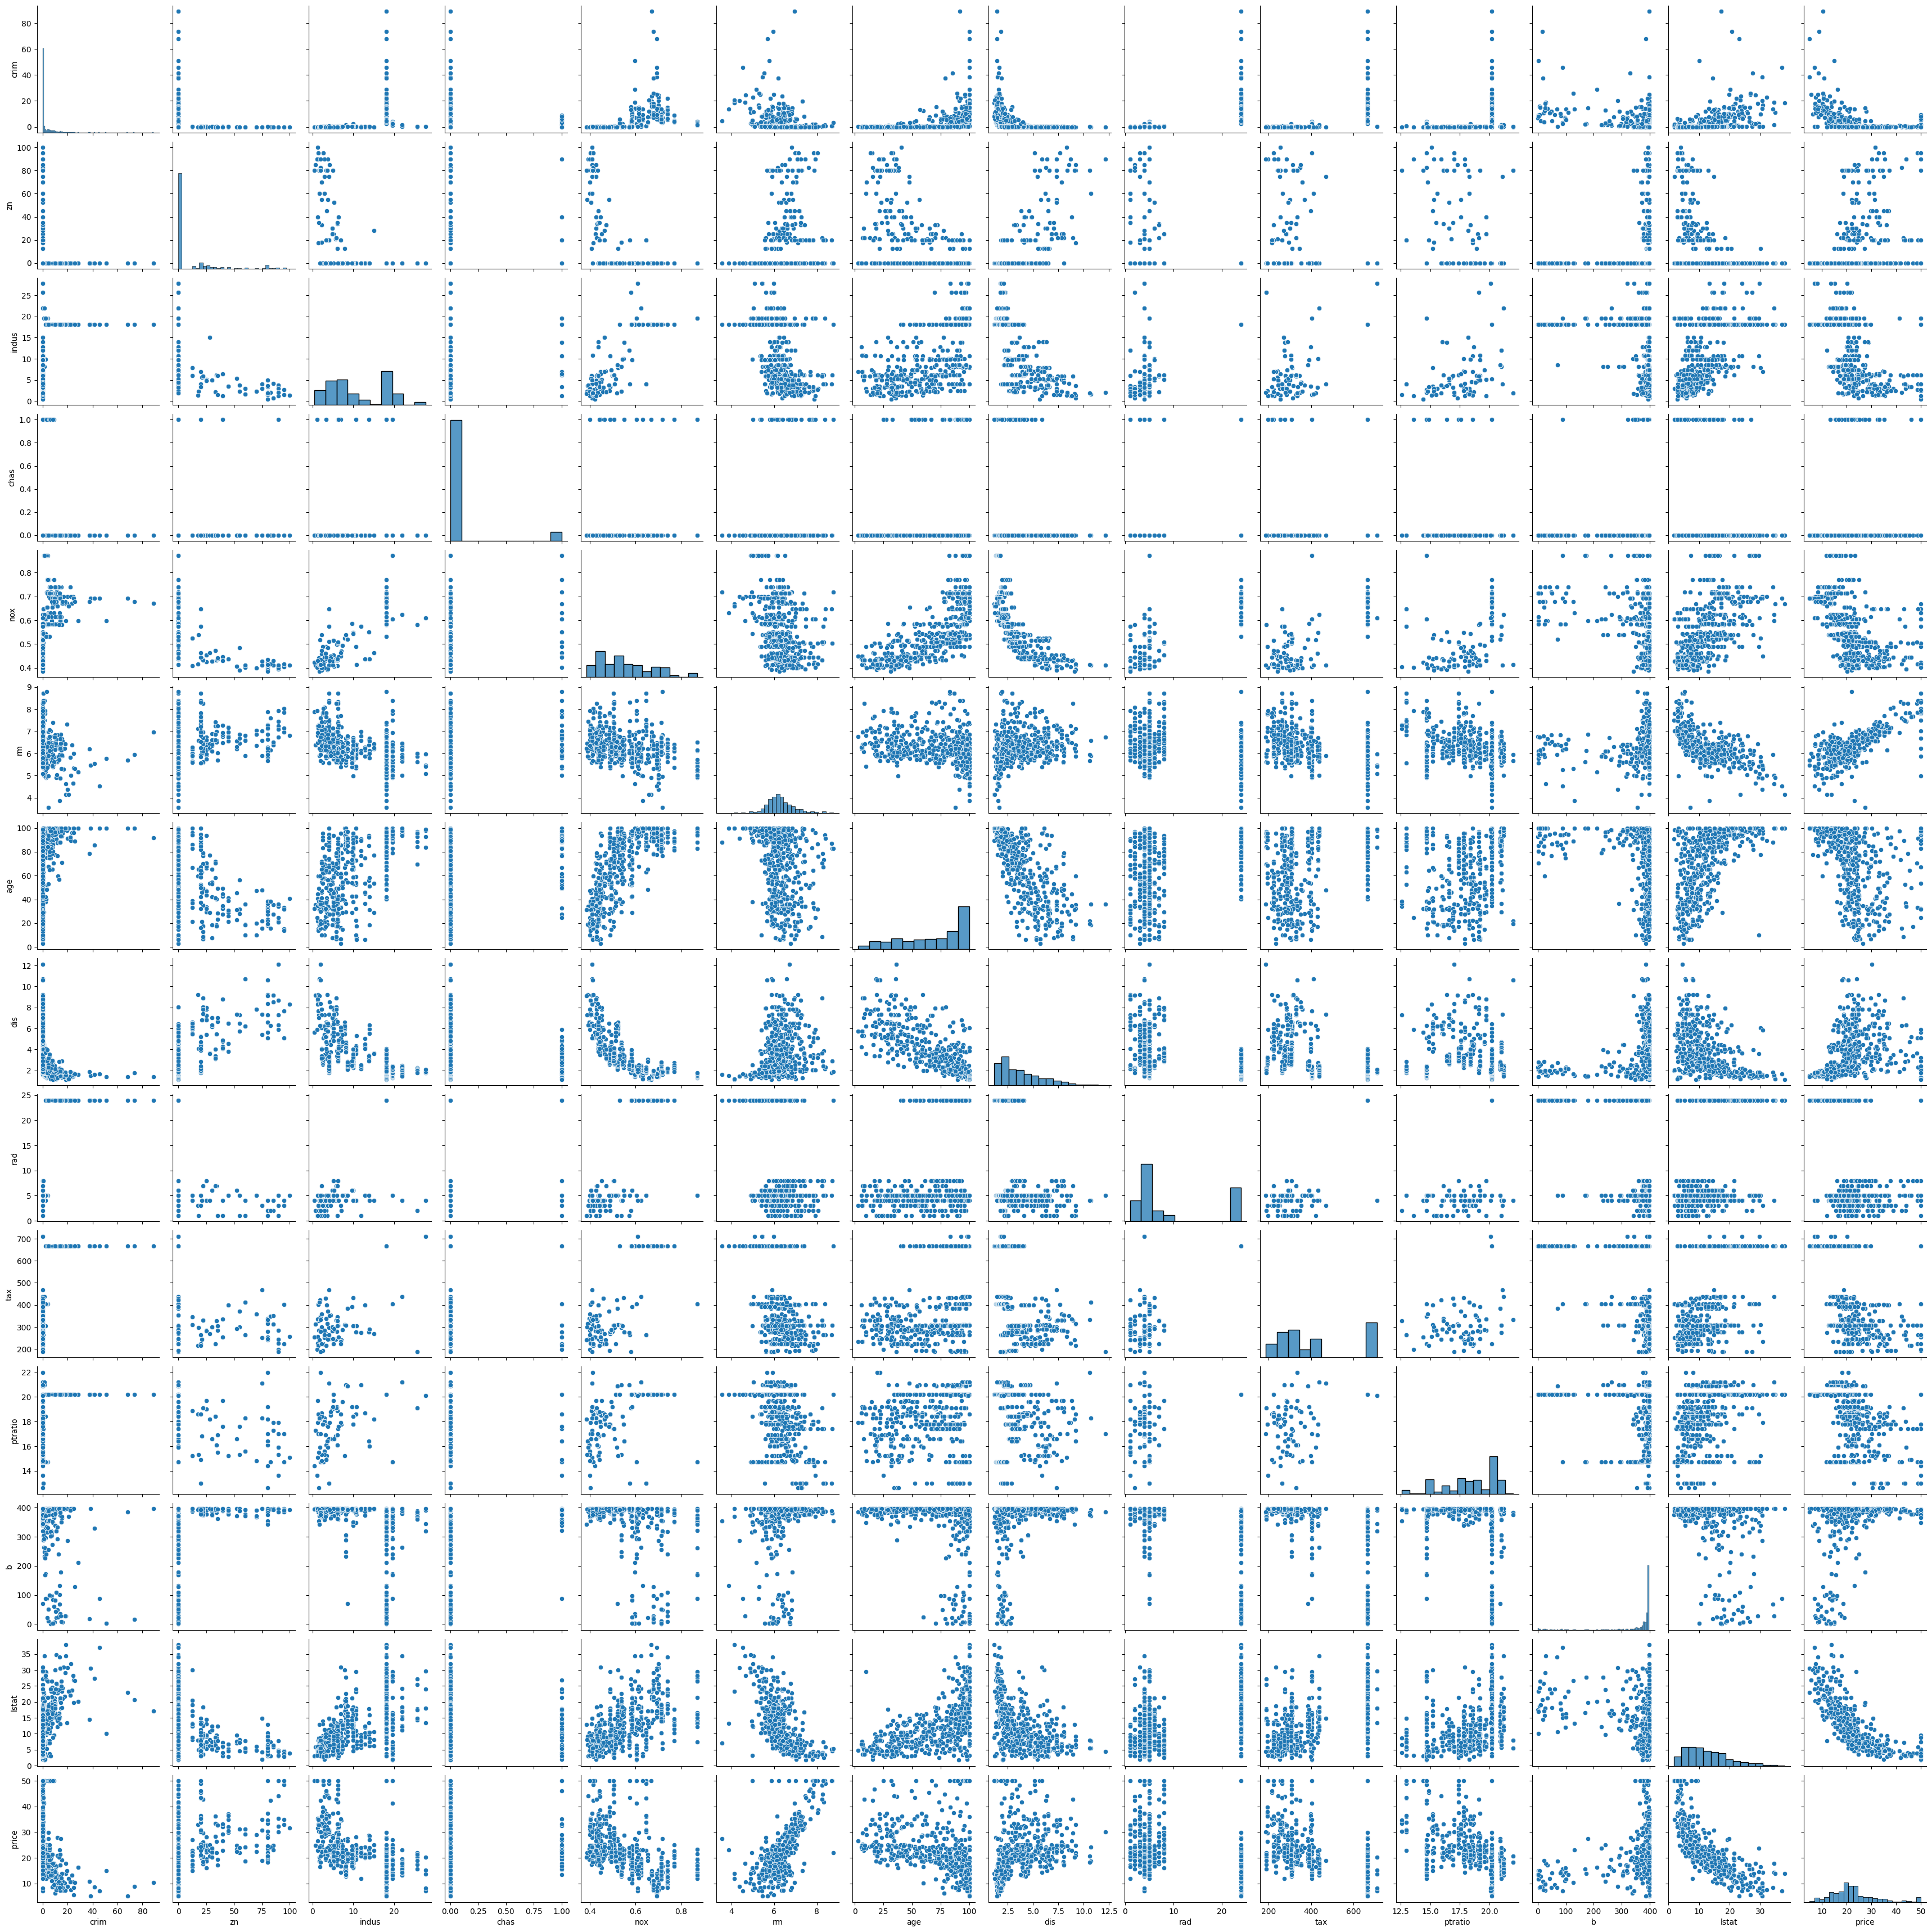

In [58]:
import seaborn as sns
sns.pairplot(data)

Text(0, 0.5, 'House price')

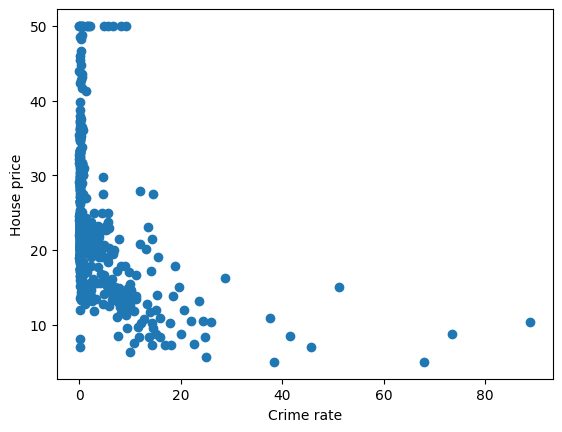

In [59]:
plt.scatter(data['crim'], data['price'])
plt.xlabel("Crime rate")
plt.ylabel("House price")

Text(0, 0.5, 'price')

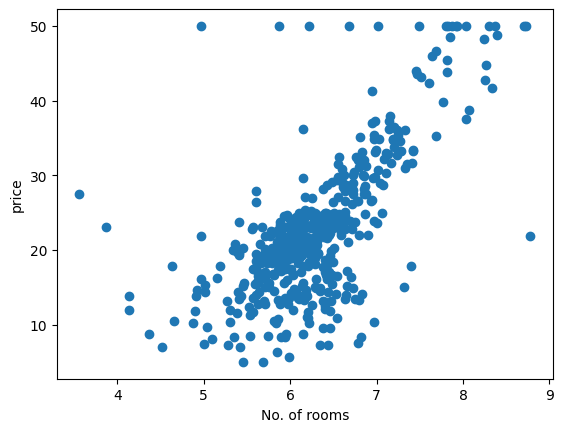

In [60]:
plt.scatter(data['rm'],data['price'])
plt.xlabel('No. of rooms')
plt.ylabel('price')

<Axes: xlabel='rm', ylabel='price'>

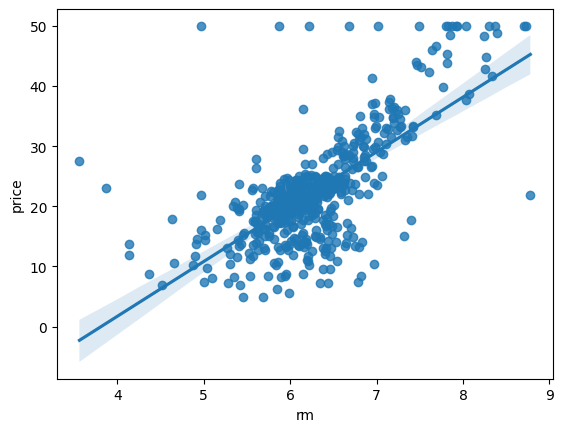

In [61]:
sns.regplot(x="rm",y="price", data=data)

<Axes: xlabel='lstat', ylabel='price'>

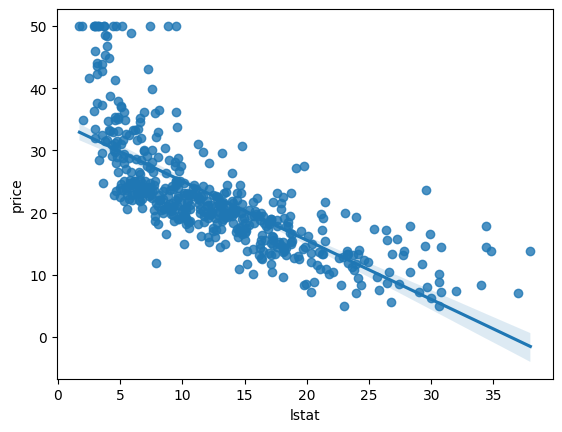

In [62]:
sns.regplot(x="lstat", y="price", data=data)

## tax is decreasing 

<Axes: xlabel='chas', ylabel='price'>

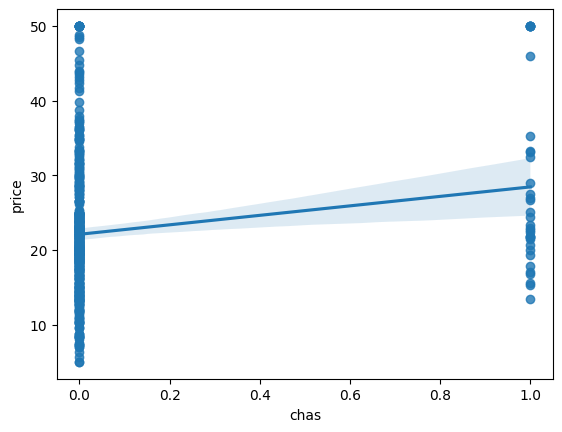

In [63]:
sns.regplot(x='chas',y='price',data=data)

<Axes: xlabel='ptratio', ylabel='price'>

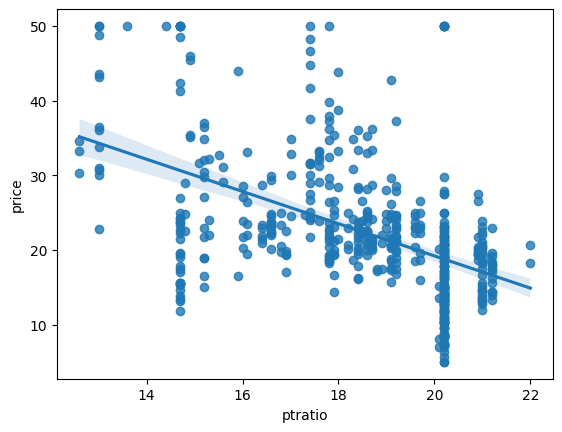

In [64]:
sns.regplot(x="ptratio",y="price",data=data)

<Axes: xlabel='tax', ylabel='price'>

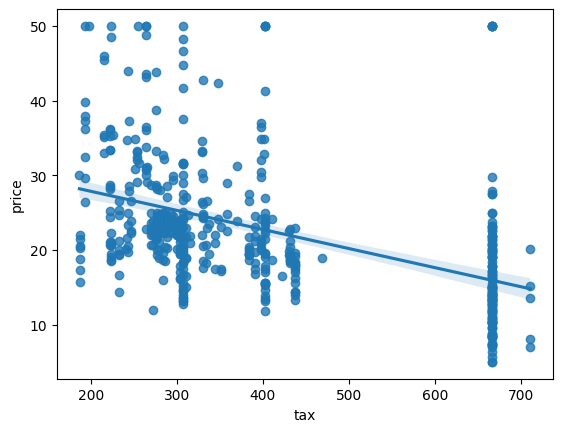

In [65]:
sns.regplot(x="tax",y="price",data=data)

In [66]:
##indpendent and dependent features

x= data.iloc[:,:-1]
y = data.iloc[:,-1]

In [67]:
x.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [68]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [69]:
# train,test, split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [70]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [71]:
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: price, Length: 354, dtype: float64

In [72]:
#Standard scalar
#using gradient descent, aim is to come to global minima, but the data is in different units. Converging of the gradient goes faster when we normalize/standardize, all data points to same scale.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [73]:
x_train = scaler.fit_transform(x_train)

In [74]:
x_test = scaler.transform(x_test)

In [75]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
regression = LinearRegression()

In [78]:
regression.fit(x_train,y_train)

LinearRegression()

In [79]:
##print the coeff and the intercept

print(regression.coef_)
print()
print(regression.intercept_)

[-1.10823836  0.81189823  0.35257783  0.81518768 -1.79607311  2.90447276
 -0.29378061 -2.93049502  2.09664195 -1.44672618 -2.05845103  1.02339256
 -3.88893987]

23.015819209039545


In [80]:
## Predicton with test data

reg_pred = regression.predict(x_test)

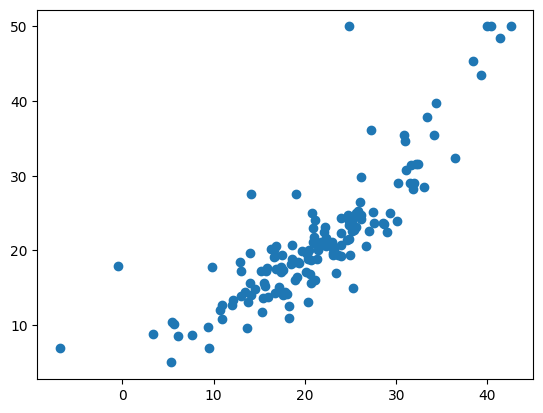

In [81]:
#plot a scatter plot for prediction

plt.scatter(reg_pred,y_test)

In [82]:
#error
residual = y_test-reg_pred
residual

173    -5.032525
274    -4.086021
491    -1.818933
72     -2.593196
452    -2.755427
         ...    
441    -0.301415
23      1.123598
225    10.053915
433    -2.382093
447    -5.687081
Name: price, Length: 152, dtype: float64

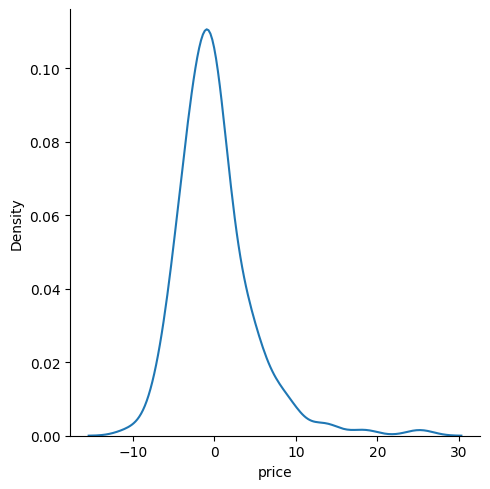

In [83]:
#plot this residual
#normal distribution
sns.displot(residual, kind='kde')

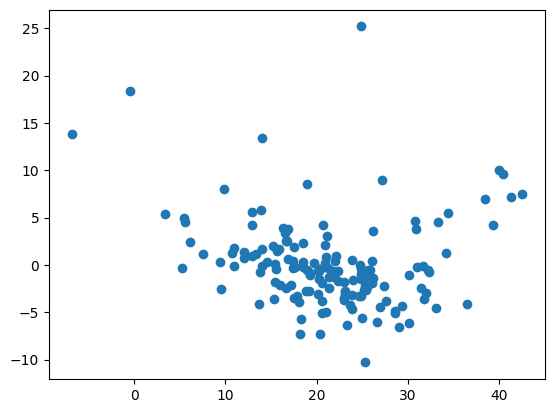

In [84]:
#scatter plot wrt to prediction and reidual
#uniform distribution
plt.scatter(reg_pred,residual)

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1739886727549296
21.59828867254202
4.647395902281407


In [86]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)


0.7101410361770549


In [87]:
#r2_score
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6828354816140239

### New Data Prediction

In [88]:
data.iloc[0,:-1].values.reshape(1,-1).shape

(1, 13)

In [89]:
#standardisation of new data

scaler.transform(data.iloc[0,:-1].values.reshape(1,-1))

c:\Users\aakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34603115, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [90]:
regression.predict(scaler.transform(data.iloc[0,:-1].values.reshape(1,-1)))

c:\Users\aakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.07798888])

## Pickling the Model file for deployment

In [91]:
import pickle

In [92]:
pickle.dump(regression,open("regmodel.pkl","wb"))

In [93]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))
pickel_transform = pickle.load(open('scaler.pkl','rb'))

In [94]:
pickle_model.predict(pickel_transform.transform(data.iloc[0,:-1].values.reshape(1,-1)))

c:\Users\aakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.07798888])